In [1]:
import pandas as pd
from pandas.io.json import json_normalize #package for flattening json in pandas df
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import json
import os
%matplotlib inline

In [2]:
os.chdir("./runs/approx/main/")
origin_path = os.getcwd() 
runs_id = os.listdir("./")
runs_id = [int(item) for item in runs_id]
runs_id = sorted(runs_id)

In [3]:
df_list = []
for run_id in runs_id:
    os.chdir("./"+str(run_id))
    f_in = open('out.json', 'r')
    run_info = json.load(f_in)
    f_in.close()
    a = json_normalize(run_info)
    df_list.append(a)
    os.chdir(origin_path)
res1 = pd.concat(df_list,ignore_index=True)

In [4]:
res_correct = res1

In [26]:
res_correct[res_correct['Out info.MSE'] < 0.9e-9]

,Model info.a,Model info.b,Model info.dim,Model info.eps,Model info.iters,Model info.k,Model info.m,Model info.max_t,Model info.n_sig,Out info.J_fin,Out info.MSE,Out info.Std,Out info.Time
50,0,6.283185,1,1.000000e-09,100000,1,10,200,13,8.481635e-10,8.481635e-10,0.000031,87.193648
77,0,6.283185,1,1.000000e-09,100000,1,10,200,20,7.158401e-10,7.158401e-10,0.000028,135.381111
92,0,6.283185,1,1.000000e-09,100000,1,10,200,24,8.366615e-10,8.366615e-10,0.000030,88.851291
108,0,6.283185,1,1.000000e-09,100000,1,10,200,28,7.022259e-10,7.022259e-10,0.000028,116.871864
110,0,6.283185,1,1.000000e-09,100000,1,10,200,28,8.470088e-10,8.470088e-10,0.000031,85.176691
137,0,6.283185,1,1.000000e-09,100000,1,10,200,35,7.683114e-10,7.683114e-10,0.000029,125.560257
147,0,6.283185,1,1.000000e-09,100000,1,10,200,37,8.767481e-10,8.767481e-10,0.000031,159.793518
181,0,6.283185,1,1.000000e-09,100000,1,10,200,46,8.874150e-10,8.874150e-10,0.000031,118.845316


In [9]:
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True
matplotlib.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}']

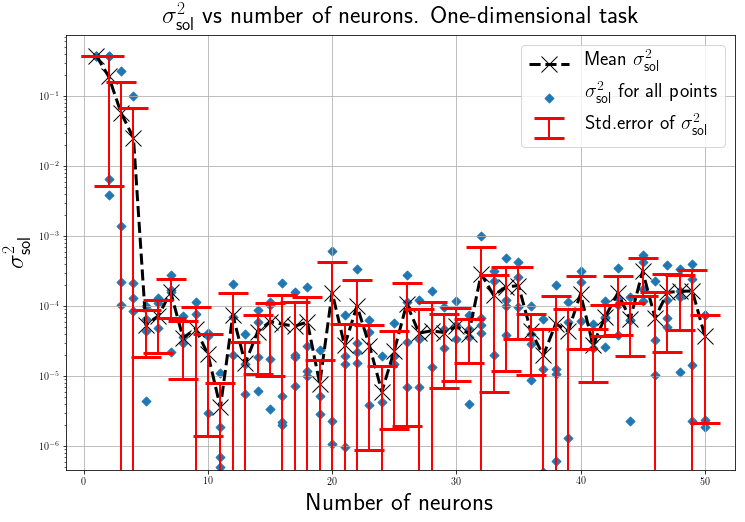

In [18]:
m_sig_all = np.array(res_correct['Model info.n_sig'].tolist())
mse_all = np.array(res_correct['Out info.MSE'].tolist())
mse_means = []
std_errs = []
h = 4
for i in range(50):
    ds = res_correct[0+h*i:h+h*i]
    mse_l = np.array(ds['Out info.MSE'].tolist())
    mse_means.append(np.mean(mse_l))
    std_errs.append(np.std(mse_l))

my_set = set(m_sig_all)
m_sig = sorted( list(my_set) ) 

figure = plt.figure(figsize=(12,8))
axes = figure.add_subplot (1, 1, 1)
plt.grid(True)
plt.title(r'$\sigma_{\text{sol}}^2$ vs number of neurons. One-dimensional task', fontsize=25)
plt.xlabel('Number of neurons', fontsize=25)
plt.ylabel(r'$\sigma_{\text{sol}}^2$', fontsize=25)
plt.scatter(m_sig_all, mse_all, label = r'$\sigma_{\text{sol}}^2$ for all points', marker = "D",s=40)
plt.plot(m_sig, mse_means, color='black', marker='x', linestyle='dashed', linewidth=3, markersize=16, label = r'Mean $\sigma_{\text{sol}}^2$')
plt.errorbar(m_sig, mse_means, yerr=std_errs, ecolor='r', lw=2, capsize=15, mew = 3, zorder=3, label = r'Std.error of $\sigma_{\text{sol}}^2$', linestyle='None')

axes.set_yscale ('log')
plt.legend(loc=1, prop={'size': 20})

In [ ]:
m_sig_all = np.array(res_correct['Model info.n_sig'].tolist())
J_all = np.array(res_correct['Out info.J_fin'].tolist())
J_means = []
std_errs = []
h = 4
for i in range(15):
    ds = res_correct[0+h*i:h+h*i]
    J_l = np.array(ds['Out info.J_fin'].tolist())
    J_means.append(np.mean(J_l))
    std_errs.append(np.std(mse_l))

my_set = set(m_sig_all)
m_sig = sorted( list(my_set) ) 



figure = plt.figure(figsize=(12,8))
axes = figure.add_subplot (1, 1, 1)
plt.grid(True)
plt.title('J_fin vs number of neurons', fontsize=15)
plt.xlabel('Number of neurons', fontsize=15)
plt.ylabel('J_fin', fontsize=15)
plt.scatter(m_sig_all, mse_all, label = 'J_fin for all points', marker = "D",s=40)
plt.plot(m_sig, mse_means, color='black', marker='x', linestyle='dashed', linewidth=3, markersize=16, label = 'Mean J_fin')
plt.errorbar(m_sig, mse_means, yerr=std_errs, ecolor='r', lw=2, capsize=15, mew = 3, zorder=3, label = 'Std.error of J_fin', linestyle='None')

axes.set_yscale ('log')
plt.legend(loc=1, prop={'size': 14})